# Postwork 7:  Procesamiento de Lenguaje Natural

In [188]:
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [56]:
df = pd.read_csv('/content/drive/MyDrive/20191226-reviews.csv')
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


## Limpiar tus datos estructurados

In [57]:
df = df.dropna()
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [107]:
grouped_by_asin = df.groupby('asin')['body'].max()

grouped_by_asin

asin
B0000SX2UC    ok well im in school and i need the text messa...
B001AO4OUC    it withstands a lot and is worth the money onl...
B001DCJAJG    this phone was the one my husband got when we ...
B001GQ3DJM    Short: This phone works fine as a basic phone,...
B0029F2O3A    This is probably the wrost experience i had wi...
                                    ...                        
B07ZGHYFZ4    It'd be best to gain knowledge about this phon...
B07ZHPCJW3    This phone isnt worth the price. While it has ...
B07ZPJBN55    I've only had this phone for a couple of weeks...
B07ZPKZSSC    Phone came, turned on and allowed me to set it...
B081H6STQQ    update Nov 4, 2019 This phone is crap if you a...
Name: body, Length: 630, dtype: object

In [59]:
grouped_by_asin = grouped_by_asin.str.lower()
grouped_by_asin = grouped_by_asin.str.strip()
grouped_by_asin = grouped_by_asin.str.replace('[^\w\s]', '')
grouped_by_asin = grouped_by_asin.str.replace('\d', '')
grouped_by_asin = grouped_by_asin.str.replace('\\n', '')
grouped_by_asin = grouped_by_asin.dropna()

grouped_by_asin

asin
B0000SX2UC    ok well im in school and i need the text messa...
B001AO4OUC    it withstands a lot and is worth the money onl...
B001DCJAJG    this phone was the one my husband got when we ...
B001GQ3DJM    short this phone works fine as a basic phone i...
B0029F2O3A    this is probably the wrost experience i had wi...
                                    ...                        
B07ZGHYFZ4    itd be best to gain knowledge about this phone...
B07ZHPCJW3    this phone isnt worth the price while it has g...
B07ZPJBN55    ive only had this phone for a couple of weeks ...
B07ZPKZSSC    phone came turned on and allowed me to set it ...
B081H6STQQ    update nov   this phone is crap if you are a t...
Name: body, Length: 630, dtype: object

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
# Separamos cada oración en palabras

tokenized = grouped_by_asin.apply(nltk.word_tokenize)

In [62]:
tokenized

asin
B0000SX2UC    [ok, well, im, in, school, and, i, need, the, ...
B001AO4OUC    [it, withstands, a, lot, and, is, worth, the, ...
B001DCJAJG    [this, phone, was, the, one, my, husband, got,...
B001GQ3DJM    [short, this, phone, works, fine, as, a, basic...
B0029F2O3A    [this, is, probably, the, wrost, experience, i...
                                    ...                        
B07ZGHYFZ4    [itd, be, best, to, gain, knowledge, about, th...
B07ZHPCJW3    [this, phone, isnt, worth, the, price, while, ...
B07ZPJBN55    [ive, only, had, this, phone, for, a, couple, ...
B07ZPKZSSC    [phone, came, turned, on, and, allowed, me, to...
B081H6STQQ    [update, nov, this, phone, is, crap, if, you, ...
Name: body, Length: 630, dtype: object

In [63]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: ok well im in school and i need...>

## Explorar contextos

In [23]:
text.concordance('internet', lines=10)

Displaying 10 of 25 matches:
ng it for after researching on the internet i found several users who used thi
takes beautiful pictures and video internet works good phone is great for call
ch screen when i view pages on the internet the text is clear and pictures ver
nect and overall speed as this one internet webpage video viewing the chrome b
r i use maxthon browser with great internet viewing results and it renders web
 i turn off wifi when i am off the internet or email etc however i run my brig
 gives me the ability to view many internet videos i use maxthon browser and h
onal for my everyday routine needs internet entertainment and main line commun
de it works realy good i go on the internet and youtube and play everything on
rural area and my phone is my only internet and has a high quality display thi


In [25]:
text.concordance('iphone', lines=10)

Displaying 10 of 69 matches:
ce i dont think its wise to risk my iphone breaking every time i exercise in a
 want to spend much money wish your iphone could resist uv radiationwatersands
tter then lumia if you compare with iphone s the lumia standsout and has sharp
 or whenever apple introduces a new iphone size this year samsung has finally 
n enough cheers this will be the rd iphone s i have had to return for being de
tarting over with a new phone every iphone was sold through electronic deals a
 the same vendor because i love the iphone it is priced reasonably and they ar
n for all my time and troubles this iphone is by far the worst yet it freezes 
price or better yet a complimentary iphone wouldnt hurt received quickly and j
 been excellent and when calling an iphone about two or three feet away with b


In [26]:
text.similar('iphone')

phone s camera way hand screen a time battery price seller face
problem device app case size review internet top


In [27]:
text.similar('android')

it this camera call use photos the phone free get that phones me talk
amazon do verizon fix see size


In [28]:
text.similar('samsung')

other galaxy phone month it cell old amazon time call week then best
second purchase tmo text for you nearfree


## Explora las palabras y los bigramas más comunes

In [64]:
freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 4451 samples and 45700 outcomes>


In [65]:
freq_dist.most_common(50)

[('the', 2228),
 ('i', 1326),
 ('and', 1285),
 ('it', 1140),
 ('a', 1131),
 ('to', 1131),
 ('phone', 1028),
 ('is', 799),
 ('this', 690),
 ('of', 538),
 ('for', 512),
 ('in', 480),
 ('with', 476),
 ('on', 472),
 ('not', 459),
 ('that', 445),
 ('my', 443),
 ('was', 387),
 ('you', 368),
 ('but', 352),
 ('have', 322),
 ('as', 279),
 ('so', 252),
 ('from', 196),
 ('no', 195),
 ('or', 194),
 ('if', 194),
 ('its', 193),
 ('be', 192),
 ('very', 187),
 ('had', 179),
 ('are', 179),
 ('when', 176),
 ('good', 176),
 ('just', 163),
 ('great', 163),
 ('like', 159),
 ('use', 159),
 ('me', 157),
 ('all', 156),
 ('they', 155),
 ('screen', 150),
 ('can', 149),
 ('would', 144),
 ('one', 142),
 ('an', 142),
 ('at', 138),
 ('get', 134),
 ('has', 133),
 ('out', 130)]

Vamos a eliminar las 'palabras vacías' o 'stop words'

In [66]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [33]:
freq_dist_no_stop_words.most_common(50)

[('phone', 1028),
 ('good', 176),
 ('great', 163),
 ('like', 159),
 ('use', 159),
 ('screen', 150),
 ('would', 144),
 ('one', 142),
 ('get', 134),
 ('battery', 129),
 ('new', 120),
 ('camera', 111),
 ('work', 108),
 ('works', 107),
 ('time', 97),
 ('phones', 96),
 ('back', 92),
 ('also', 92),
 ('samsung', 91),
 ('even', 87),
 ('android', 86),
 ('im', 84),
 ('dont', 84),
 ('well', 82),
 ('really', 80),
 ('better', 78),
 ('card', 77),
 ('iphone', 69),
 ('got', 68),
 ('wifi', 67),
 ('much', 66),
 ('make', 66),
 ('love', 66),
 ('quality', 63),
 ('apps', 63),
 ('cant', 62),
 ('price', 62),
 ('still', 62),
 ('buy', 59),
 ('using', 59),
 ('far', 58),
 ('used', 57),
 ('sim', 55),
 ('life', 55),
 ('problem', 54),
 ('google', 54),
 ('app', 54),
 ('huawei', 54),
 ('doesnt', 52),
 ('never', 51)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


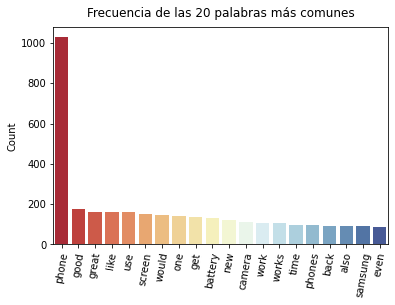

In [40]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1].astype('int'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


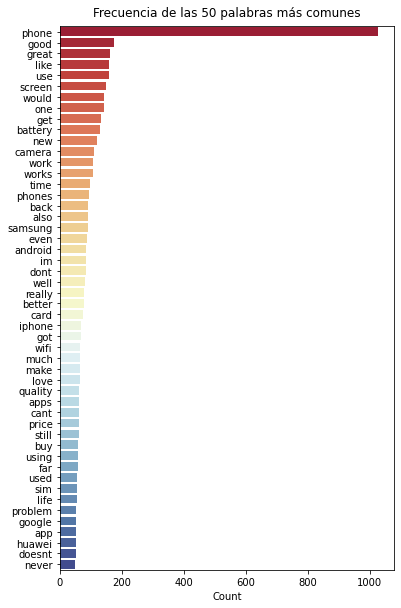

In [41]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(most_common_50[:, 1].astype('int'), most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

In [68]:
# También podemos visualizar la frecuencia de los bigramas más comunes
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('ok', 'well'): 1,
          ('well', 'im'): 3,
          ('im', 'in'): 5,
          ('in', 'school'): 1,
          ('school', 'and'): 1,
          ('and', 'i'): 61,
          ('i', 'need'): 9,
          ('need', 'the'): 3,
          ('the', 'text'): 4,
          ('text', 'messaging'): 3,
          ('messaging', 'and'): 1,
          ('and', 'ive'): 3,
          ('ive', 'had'): 12,
          ('had', 'this'): 7,
          ('this', 'phone'): 255,
          ('phone', 'for'): 39,
          ('for', 'about'): 7,
          ('about', 'a'): 5,
          ('a', 'month'): 12,
          ('month', 'and'): 3,
          ('and', 'text'): 2,
          ('messaging', 'was'): 1,
          ('was', 'supposed'): 2,
          ('supposed', 'to'): 10,
          ('to', 'start'): 6,
          ('start', 'working'): 1,
          ('working', 'weeks'): 1,
          ('weeks', 'agoa'): 1,
          ('agoa', 'conflict'): 1,
          ('conflict', 'of'): 1,
          ('of', 'software'): 1,
          ('software', 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


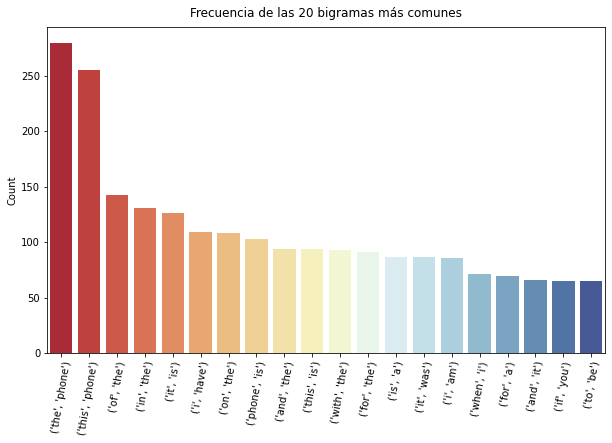

In [43]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1].astype('int'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [69]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('ok', 'well'): 1,
          ('well', 'im'): 4,
          ('im', 'school'): 1,
          ('school', 'need'): 1,
          ('need', 'text'): 1,
          ('text', 'messaging'): 3,
          ('messaging', 'ive'): 1,
          ('ive', 'phone'): 6,
          ('phone', 'month'): 2,
          ('month', 'text'): 1,
          ('messaging', 'supposed'): 1,
          ('supposed', 'start'): 1,
          ('start', 'working'): 1,
          ('working', 'weeks'): 1,
          ('weeks', 'agoa'): 1,
          ('agoa', 'conflict'): 1,
          ('conflict', 'software'): 1,
          ('software', 'type'): 1,
          ('type', 'stuff'): 1,
          ('stuff', 'btween'): 1,
          ('btween', 'nokia'): 1,
          ('nokia', 'sprintits'): 1,
          ('sprintits', 'stars'): 1,
          ('stars', 'fact'): 1,
          ('fact', 'cant'): 1,
          ('cant', 'download'): 1,
          ('download', 'ringtonesstarsor'): 1,
          ('ringtonesstarsor', 'games'): 1,
          ('games', 'starsbut'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


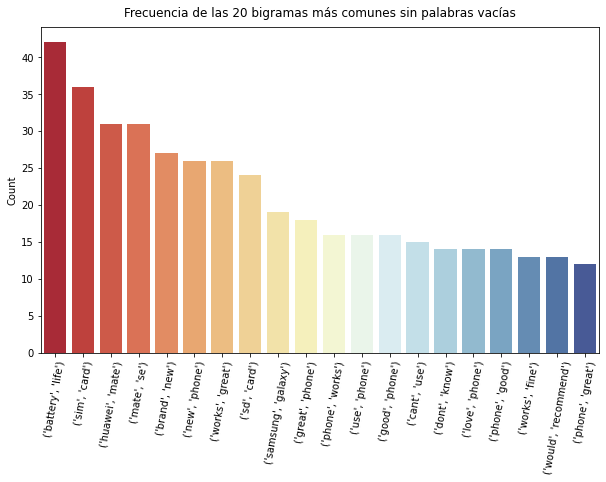

In [70]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20[:, 1].astype('int'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

## Longitudes de palabras y oraciones

In [71]:
word_lengths = [len(w) for w in all_words_except_stop_words]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


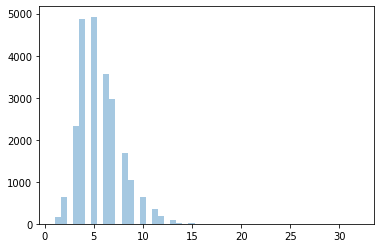

In [72]:
sns.distplot(word_lengths, kde=False, norm_hist=False);

In [103]:
sentence_lengths = grouped_by_asin.apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


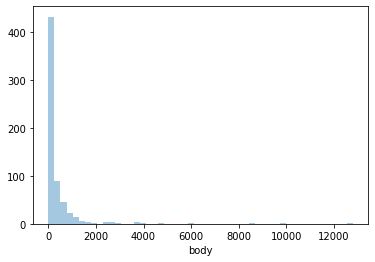

In [74]:
sns.distplot(sentence_lengths, kde=False, norm_hist=False);

Quitamos algunos outliers para apreciar mejor el histograma

In [123]:
sentence_lengths_shorter = pd.Series(sentence_lengths)
sentence_lengths_shorter = sentence_lengths_shorter[sentence_lengths_shorter<2000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


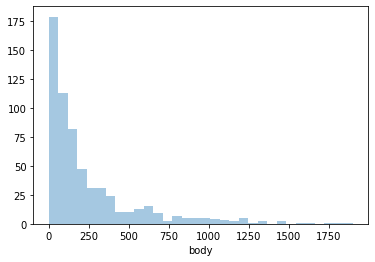

In [124]:
sns.distplot(sentence_lengths_shorter, kde=False, norm_hist=False);

In [125]:
num_of_words = grouped_by_asin.str.split(' ').str.len()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


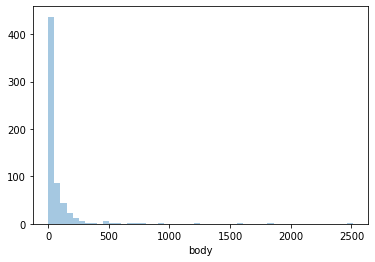

In [126]:
sns.distplot(num_of_words, kde=False, norm_hist=False);

## Nubes de palabras

In [127]:
from wordcloud import WordCloud

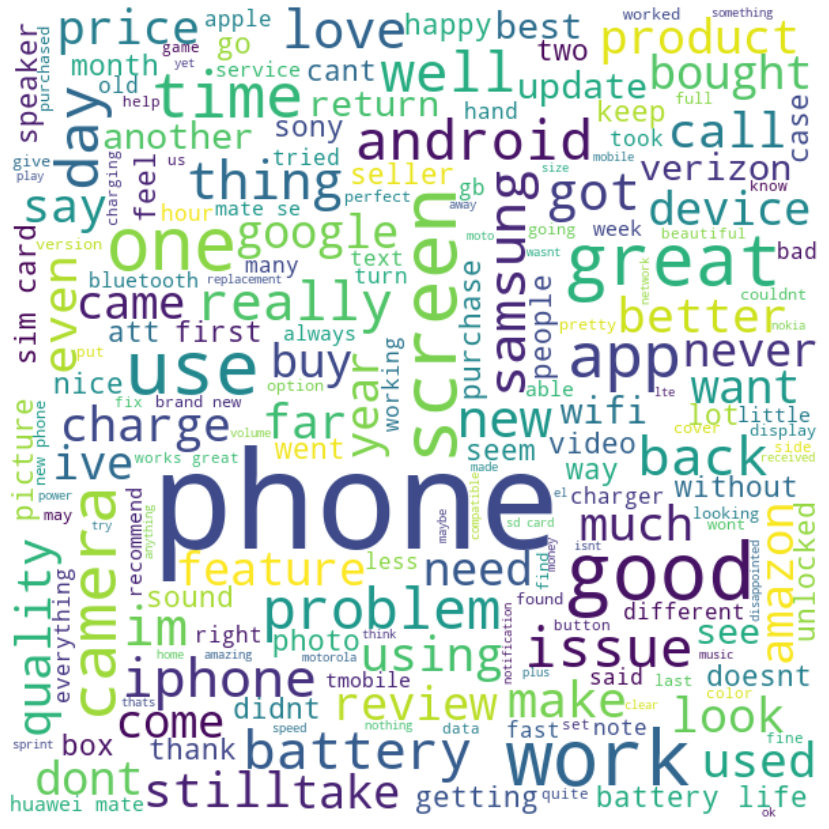

In [132]:
wordcloud = WordCloud(width=600, height=600, max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Desde aquí notamos algunas palabras como "good", "great", "love", "well", por lo que parece que hay muchas reseñas positivas.

## Análisis de sentimientos 


In [166]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'].apply(lambda rating : +1 if rating > 3 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [170]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [184]:
pos = " ".join(review for review in positive.title)

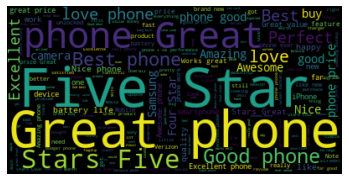

In [185]:
wordcloud2 = WordCloud(stopwords=english_stop_words).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

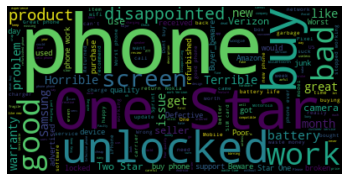

In [186]:
neg = " ".join(review for review in negative.title)
wordcloud3 = WordCloud(stopwords=english_stop_words).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [196]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Phone Sentiment', xaxis_title_text='Sentiment')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

